In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [3]:
# create some known paramters:
weight = 0.7
bias = 0.3

# create some data:
X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias
print(f'X[:10]]:\n{X[:5]}')
print(f'y[:10]]:\n{y[:5]}')

X[:10]]:
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])
y[:10]]:
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])


In [5]:
# let's split data into train and test
train_test_split = int(0.8 * len(X)) 
X_train, X_test = X[:train_test_split], X[train_test_split:]
y_train, y_test = y[:train_test_split], y[train_test_split:]
print(f'len(X_train): {len(X_train)}')
print(f'len(X_test): {len(X_test)}')
print(f'len(y_train): {len(y_train)}')
print(f'len(y_test): {len(y_test)}')


len(X_train): 40
len(X_test): 10
len(y_train): 40
len(y_test): 10


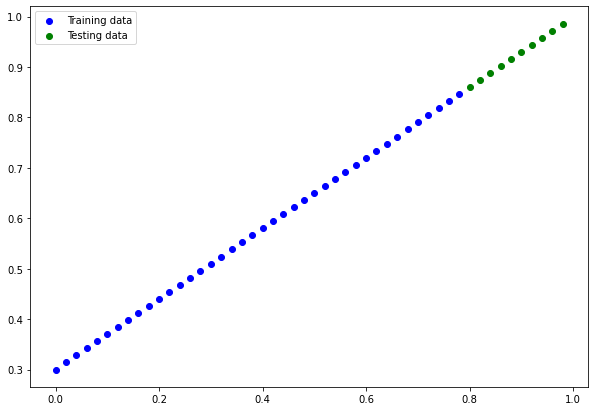

In [8]:
# let's create a plotting function
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()
plot_prediction(predictions=None)

In [32]:
# let's create a linear regression model class!
# nn.module contains all building blocks for creating neural networks
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize the model parameters
        self.weights = nn.Parameter(torch.randn(1,
                                    dtype=torch.float32,),
                                    requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                    dtype=torch.float32,),
                                    requires_grad=True)

    # any subclass of nn.Module must implement the forward method
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weights * X + self.bias





In [33]:
# let's create an instance of the model class 
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [34]:
# let's make some predictions with our untrained model
with torch.inference_mode():
    y_preds = model_0.forward(X_test)
    

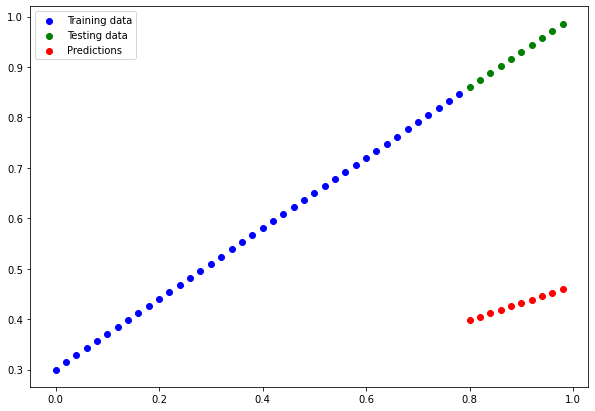

In [35]:
# let's plot our predictions
plot_prediction(predictions=y_preds)

In [36]:
# Lets train our model now

# before making the training loop, we should make a loss function and an optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=1e-1)

In [37]:
# let's make a training loop
epochs = 100
train_losses = []
test_losses = []
epoch_counter = []

for epoch in range(epochs):
    # training phase:
    # put the model on train mode
    model_0.train()

    # forward pass on train data
    train_preds = model_0(X_train)

    # calculate the loss
    train_loss = loss_fn(train_preds, y_train)
    
    # zero the gradients
    optimizer.zero_grad()

    # backward pass
    train_loss.backward()

    # update the parameters
    optimizer.step()

    # testing phase:
    # put the model on testing mode
    model_0.eval()
    with torch.inference_mode():
        # forward pass on test data
        test_preds = model_0(X_test)
        # calculate the loss
        test_loss = loss_fn(test_preds, y_test)

        # print what is happening
        if epoch % 10 == 0:
            epoch_counter.append(epoch)
            train_losses.append(train_loss.detach().numpy()) # detach the tensor from the computational graph
            test_losses.append(test_loss.detach().numpy())  # detach the tensor from the computational graph
            print(f'Epoch: {epoch}, Train loss: {train_loss.item():.4f}, Test loss: {test_loss.item():.4f}')





Epoch: 0, Train loss: 0.3129, Test loss: 0.3598
Epoch: 10, Train loss: 0.0254, Test loss: 0.0543
Epoch: 20, Train loss: 0.0398, Test loss: 0.1193
Epoch: 30, Train loss: 0.0398, Test loss: 0.1193
Epoch: 40, Train loss: 0.0398, Test loss: 0.1193
Epoch: 50, Train loss: 0.0398, Test loss: 0.1193
Epoch: 60, Train loss: 0.0398, Test loss: 0.1193
Epoch: 70, Train loss: 0.0398, Test loss: 0.1193
Epoch: 80, Train loss: 0.0398, Test loss: 0.1193
Epoch: 90, Train loss: 0.0398, Test loss: 0.1193


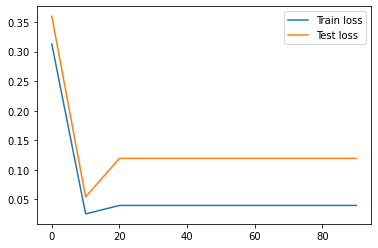

In [38]:
# let's plot the losses
plt.plot(epoch_counter, train_losses, label='Train loss')
plt.plot(epoch_counter, test_losses, label='Test loss')
plt.legend()
plt.show()


In [39]:
# now we can make predictions with our trained model
with torch.inference_mode():
    y_preds = model_0(X_test)



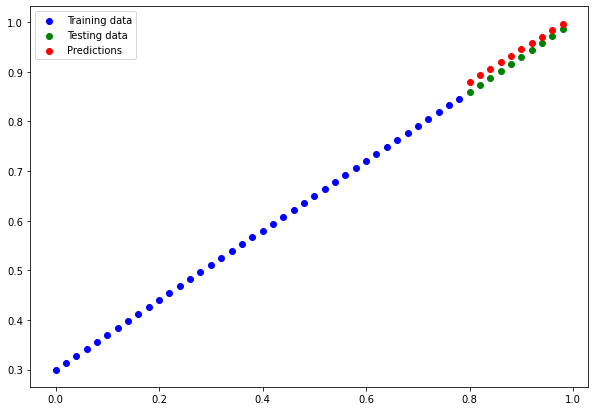

In [40]:
plot_prediction(predictions=y_preds)

In [41]:
# now that we have a trained model, we can save it
# let's save the model's state_dict

from pathlib import Path

# step 1: create a folder to save the model
Path('models').mkdir(exist_ok=True)

# step 2: create a model save path
save_path = Path('models/linear_regression_model.pt')

# step 3: save the model's state_dict
torch.save(model_0.state_dict(), save_path)


In [42]:
# now we can load the model
# step 1: create a model instance
loaded_model_0 = LinearRegressionModel()

# step 2: load the model's state_dict
loaded_model_0.load_state_dict(torch.load(save_path))

<All keys matched successfully>